In [2]:
from transformers import AutoModel, AutoTokenizer
import os
import csv

def process_c_files(folder_path):
    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file has a .c extension
        if filename.endswith('.c'):
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)
            
            # Open and read the file content
            with open(file_path, 'r') as file:
                file_content = file.read()
            
            # Apply the function f to the file content
            f(file_content)

checkpoint = "./CodeT5P"
device = "cpu"  # for GPU usage or "cpu" for CPU usage
folder_path = './result/0802-llama-7b-Instruct_2_100_2'

tokenizer = AutoTokenizer.from_pretrained(checkpoint, trust_remote_code=True)
model = AutoModel.from_pretrained(checkpoint, trust_remote_code=True).to(device)

x = []

for filename in os.listdir(folder_path):
        # Check if the file has a .c extension
        if filename.endswith('.c'):
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)
            
            # Open and read the file content
            with open(file_path, 'r') as file:
                file_content = file.read()

            inputs = tokenizer.encode(file_content, return_tensors="pt").to(device)
            embedding = model(inputs)[0]
            x.append(embedding)
            print(f'Dimension of the embedding: {embedding.size()[0]}, with norm={embedding.norm().item()}')
# Dimension of the embedding: 256, with norm=1.0
            #print(embedding)

tensor_list = [tensor.tolist() for tensor in x]

# Specify the CSV file name
csv_filename = 'tensors_0802-llama-7b-Instruct_2_100_2.csv'

# Write the list of tensors to a CSV file
with open(csv_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write each tensor as a row in the CSV file
    writer.writerows(tensor_list)

print(f"CSV file '{csv_filename}' created successfully.")

# tensor([ 0.0185,  0.0229, -0.0315, -0.0307, -0.1421, -0.0575, -0.0275,  0.0501,
#          0.0203,  0.0337, -0.0067, -0.0075, -0.0222, -0.0107, -0.0250, -0.0657,
#          0.1571, -0.0994, -0.0370,  0.0164, -0.0948,  0.0490, -0.0352,  0.0907,
#         -0.0198,  0.0130, -0.0921,  0.0209,  0.0651,  0.0319,  0.0299, -0.0173,
#         -0.0693, -0.0798, -0.0066, -0.0417,  0.1076,  0.0597, -0.0316,  0.0940,
#         -0.0313,  0.0993,  0.0931, -0.0427,  0.0256,  0.0297, -0.0561, -0.0155,
#         -0.0496, -0.0697, -0.1011,  0.1178,  0.0283, -0.0571, -0.0635, -0.0222,
#          0.0710, -0.0617,  0.0423, -0.0057,  0.0620, -0.0262,  0.0441,  0.0425,
#         -0.0413, -0.0245,  0.0043,  0.0185,  0.0060, -0.1727, -0.1152,  0.0655,
#         -0.0235, -0.1465, -0.1359,  0.0022,  0.0177, -0.0176, -0.0361, -0.0750,
#         -0.0464, -0.0846, -0.0088,  0.0136, -0.0221,  0.0591,  0.0876, -0.0903,
#          0.0271, -0.1165, -0.0169, -0.0566,  0.1173, -0.0801,  0.0430,  0.0236,
#          0.0060, -0.0778, -0.0570,  0.0102, -0.0172, -0.0051, -0.0891, -0.0620,
#         -0.0536,  0.0190, -0.0039, -0.0189, -0.0267, -0.0389, -0.0208,  0.0076,
#         -0.0676,  0.0630, -0.0962,  0.0418, -0.0172, -0.0229, -0.0452,  0.0401,
#          0.0270,  0.0677, -0.0111, -0.0089,  0.0175,  0.0703,  0.0714, -0.0068,
#          0.1214, -0.0004,  0.0020,  0.0255,  0.0424, -0.0030,  0.0318,  0.1227,
#          0.0676, -0.0723,  0.0970,  0.0637, -0.0140, -0.0283, -0.0120,  0.0343,
#         -0.0890,  0.0680,  0.0514,  0.0513,  0.0627, -0.0284, -0.0479,  0.0068,
#         -0.0794,  0.0202,  0.0208, -0.0113, -0.0747,  0.0045, -0.0854, -0.0609,
#         -0.0078,  0.1168,  0.0618, -0.0223, -0.0755,  0.0182, -0.0128,  0.1116,
#          0.0240,  0.0342,  0.0119, -0.0235, -0.0150, -0.0228, -0.0568, -0.1528,
#          0.0164, -0.0268,  0.0727, -0.0569,  0.1306,  0.0643, -0.0158, -0.1070,
#         -0.0107, -0.0139, -0.0363,  0.0366, -0.0986, -0.0628, -0.0277,  0.0316,
#          0.0363,  0.0038, -0.1092, -0.0679, -0.1398, -0.0648,  0.1711, -0.0666,
#          0.0563,  0.0581,  0.0226,  0.0347, -0.0672, -0.0229, -0.0565,  0.0623,
#          0.1089, -0.0687, -0.0901, -0.0073,  0.0426,  0.0870, -0.0390, -0.0144,
#         -0.0166,  0.0262, -0.0310,  0.0467, -0.0164, -0.0700, -0.0602, -0.0720,
#         -0.0386,  0.0067, -0.0337, -0.0053,  0.0829,  0.1004,  0.0427,  0.0026,
#         -0.0537,  0.0951,  0.0584, -0.0583, -0.0208,  0.0124,  0.0067,  0.0403,
#          0.0091, -0.0044, -0.0036,  0.0524,  0.1103, -0.1511, -0.0479,  0.1709,
#          0.0772,  0.0721, -0.0332,  0.0866,  0.0799, -0.0581,  0.0713,  0.0218],
#        device='cuda:0', grad_fn=<SelectBackward0>)


Dimension of the embedding: 256, with norm=0.9999999403953552
Dimension of the embedding: 256, with norm=0.9999999403953552
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=0.9999999403953552
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0


Token indices sequence length is longer than the specified maximum sequence length for this model (637 > 512). Running this sequence through the model will result in indexing errors


Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=0.9999999403953552
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=0.9999999403953552
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=0.9999999403953552
Dimension of the embedding: 256, with norm=0.9999999403953552
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0
Dimension of the embedding: 256, with norm=1.0


In [2]:
import pandas as pd
from sklearn.decomposition import PCA

# Load the CSV file into a pandas DataFrame
csv_filename = 'tensors.csv'
df = pd.read_csv(csv_filename)

# Assuming each row is a vector and each column is a feature
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Convert the PCA result to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Optionally, save the PCA result to a new CSV file
pca_df.to_csv('pca_result.csv', index=False)

print(pca_df.head())  # Display the first few rows of the PCA result


        PC1       PC2
0 -0.091357  0.339179
1  0.188604 -0.135164
2 -0.141872 -0.190372
3 -0.148081 -0.188869
4 -0.051145  0.063426


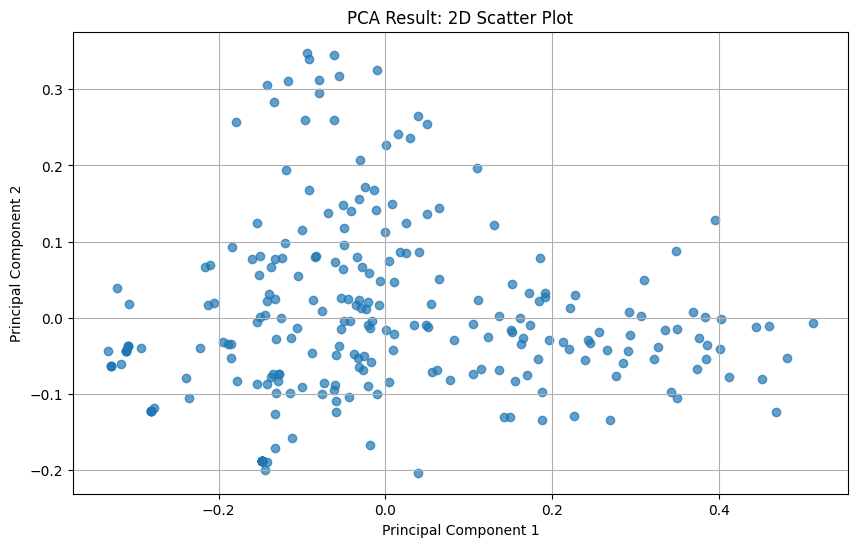

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the CSV file into a pandas DataFrame
csv_filename = 'tensors.csv'
df = pd.read_csv(csv_filename)

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Convert the PCA result to a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plotting the PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA Result: 2D Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


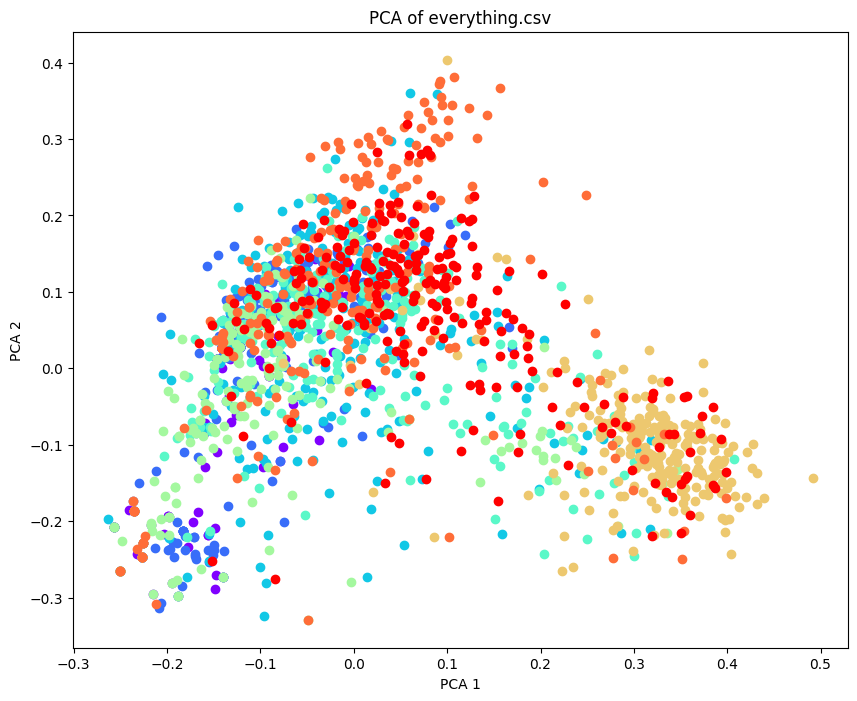

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the CSV file
file_path = './csvs/everything.csv'
data = pd.read_csv(file_path)

# Step 2: Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Step 3: Plot the PCA results
plt.figure(figsize=(10, 8))

# Number of points per color
points_per_color = 250

# Generate colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(pca_result) // points_per_color + 1))

for i in range(0, len(pca_result), points_per_color):
    plt.scatter(pca_result[i:i + points_per_color, 0], pca_result[i:i + points_per_color, 1], color=colors[i // points_per_color])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of everything.csv')
plt.show()


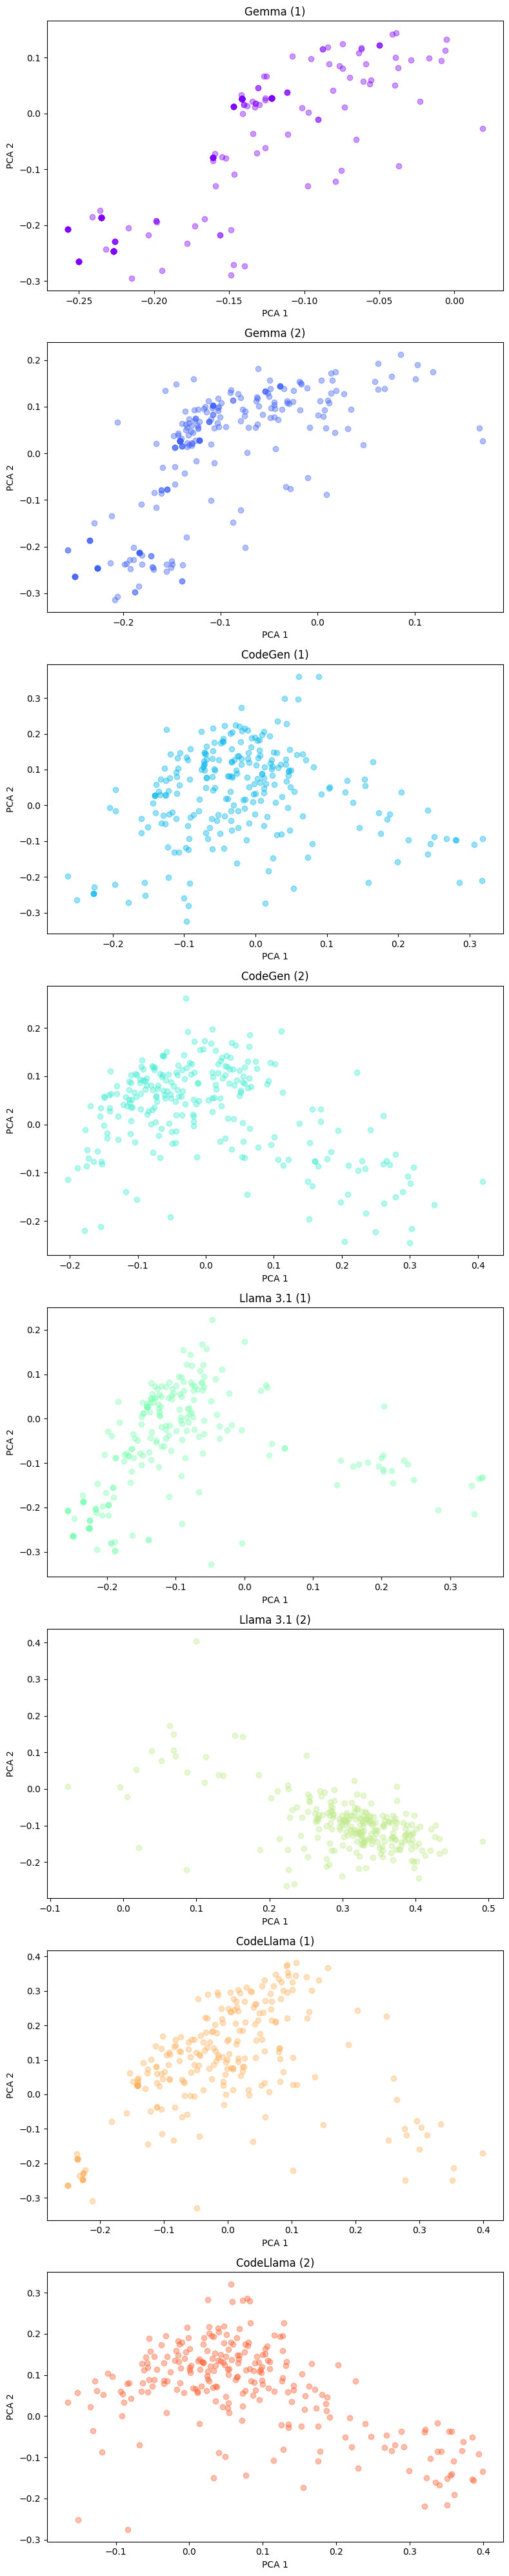

In [16]:

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the CSV file
file_path = './csvs/everything.csv'
data = pd.read_csv(file_path)

# Step 2: Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Step 3: Export the PCA results to a CSV
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
output_file_path = './csvs/pca_result.csv'
pca_df.to_csv(output_file_path, index=False)

# Step 4: Create subplots faceted by each 250 points
points_per_color = 250
n_groups = (len(pca_result) // points_per_color) + 1
labels = ["Gemma (1)", "Gemma (2)", "CodeGen (1)", "CodeGen (2)", 
          "Llama 3.1 (1)", "Llama 3.1 (2)", "CodeLlama (1)", "CodeLlama (2)"]

# Create subplots with a suitable layout
fig, axes = plt.subplots(n_groups, 1, figsize=(8, n_groups * 5))

# Adjusting for cases when there's only one subplot
if n_groups == 1:
    axes = [axes]

# Plot each group in its own subplot
for i in range(n_groups):
    start_index = i * points_per_color
    end_index = (i + 1) * points_per_color
    axes[i].scatter(pca_result[start_index:end_index, 0], pca_result[start_index:end_index, 1], 
                    color=plt.cm.rainbow(i / n_groups), alpha=0.4)
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('PCA 1')
    axes[i].set_ylabel('PCA 2')

plt.tight_layout()
#plt.show()


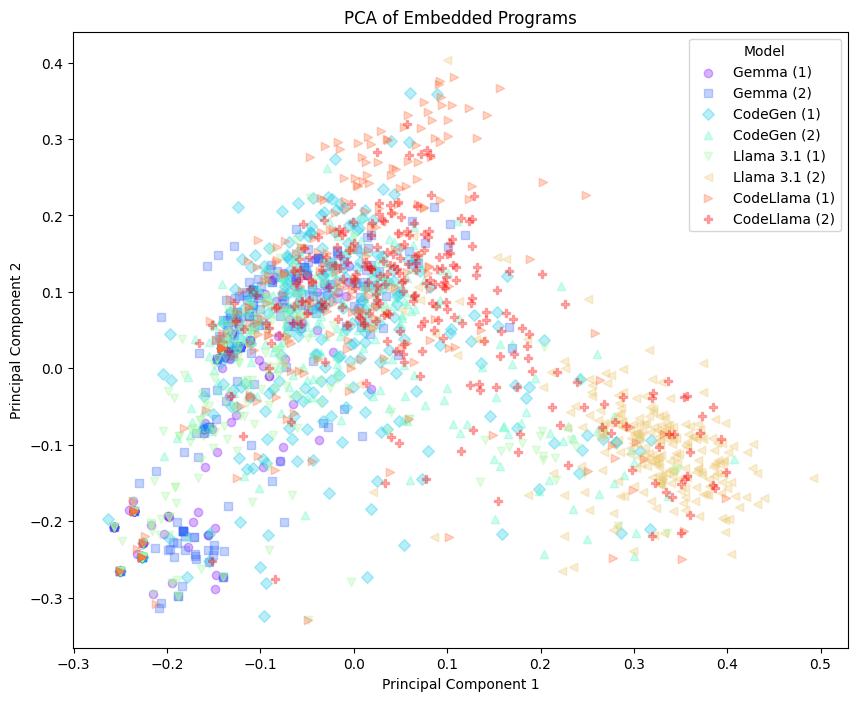

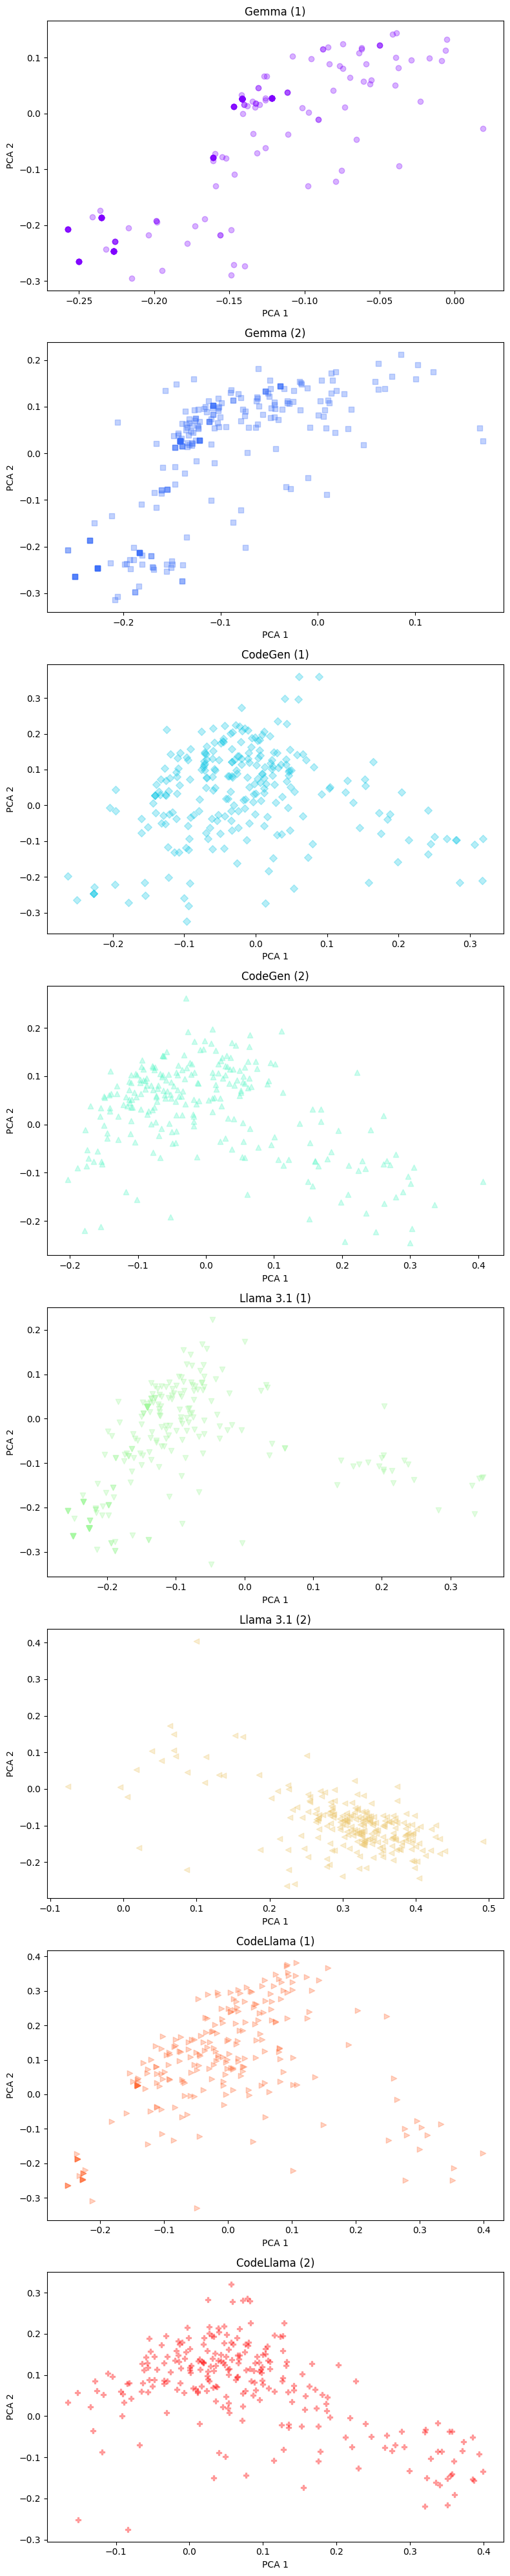

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the CSV file
file_path = './csvs/everything.csv'
data = pd.read_csv(file_path)

# Step 2: Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Step 3: Export the PCA results to a CSV
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
output_file_path = './csvs/pca_result.csv'
pca_df.to_csv(output_file_path, index=False)

# Labels for the colors and markers
labels = ["Gemma (1)", "Gemma (2)", "CodeGen (1)", "CodeGen (2)", 
          "Llama 3.1 (1)", "Llama 3.1 (2)", "CodeLlama (1)", "CodeLlama (2)"]
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P']  # Different shapes

# Number of points per color
points_per_color = 250
n_groups = (len(pca_result) // points_per_color) + 1

# Step 4: Create the combined plot
plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, n_groups))

for i in range(n_groups):
    start_index = i * points_per_color
    end_index = (i + 1) * points_per_color
    plt.scatter(pca_result[start_index:end_index, 0], pca_result[start_index:end_index, 1], 
                color=colors[i], label=labels[i], alpha=0.3, marker=markers[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Embedded Programs')
plt.legend(title = "Model")
plt.show()

# Step 5: Create subplots faceted by each 250 points
fig, axes = plt.subplots(n_groups, 1, figsize=(8, n_groups * 5))

# Adjusting for cases when there's only one subplot
if n_groups == 1:
    axes = [axes]

# Plot each group in its own subplot with different shapes
for i in range(n_groups):
    start_index = i * points_per_color
    end_index = (i + 1) * points_per_color
    axes[i].scatter(pca_result[start_index:end_index, 0], pca_result[start_index:end_index, 1], 
                    color=colors[i], alpha=0.3, marker=markers[i])
    axes[i].set_title(labels[i])
    axes[i].set_xlabel('PCA 1')
    axes[i].set_ylabel('PCA 2')

plt.tight_layout()
plt.show()


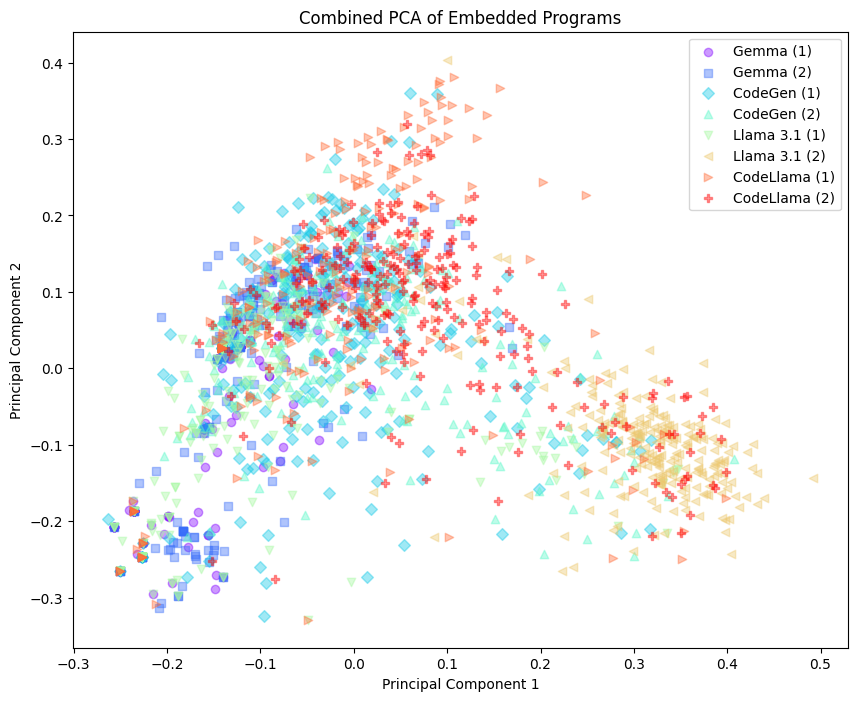

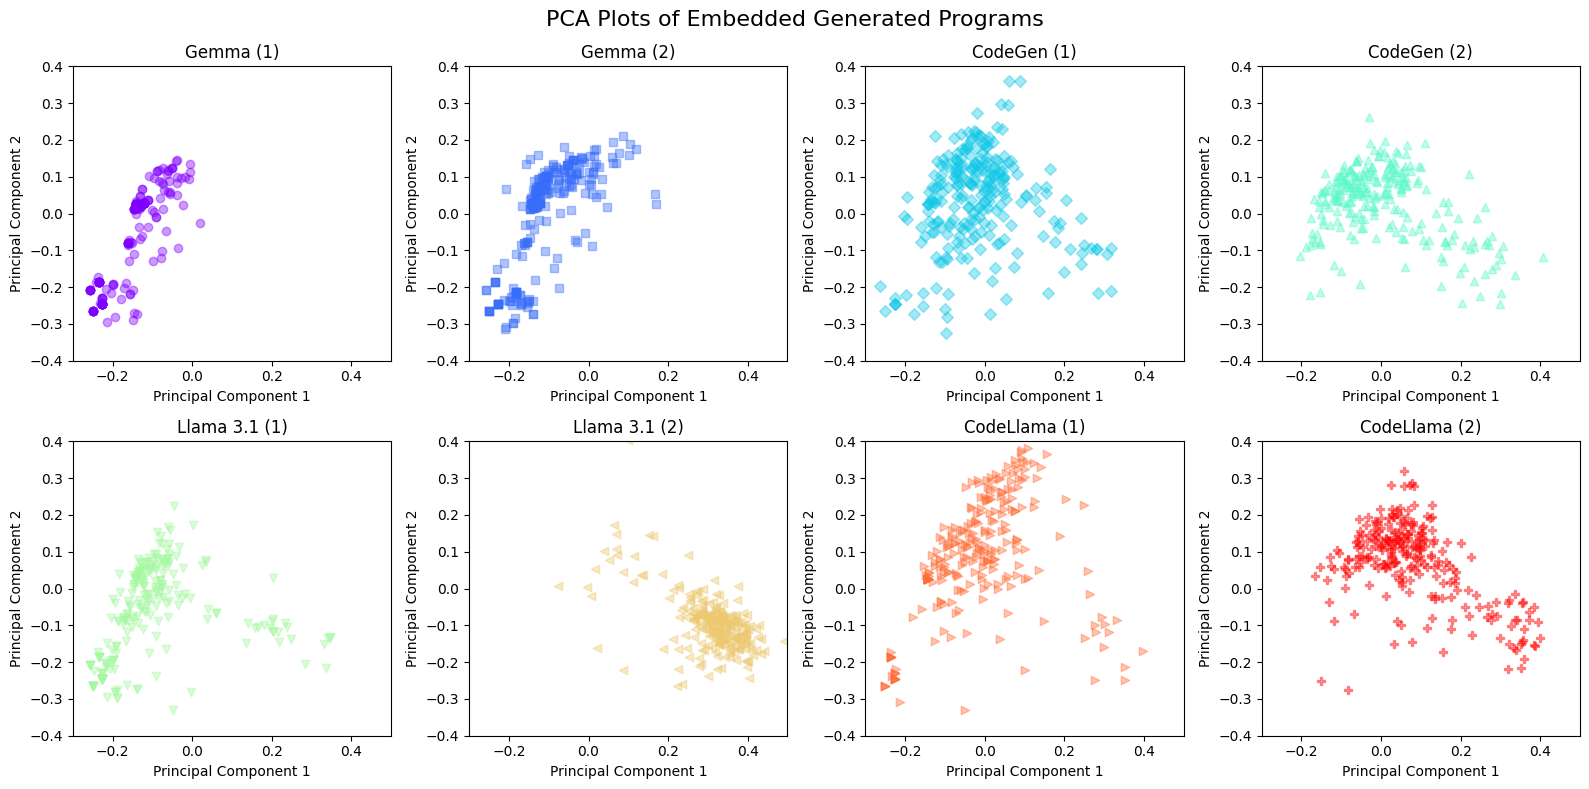

In [23]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the CSV file
file_path = './csvs/everything.csv'
data = pd.read_csv(file_path)

# Step 2: Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Step 3: Export the PCA results to a CSV
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
output_file_path = './csvs/pca_result.csv'
pca_df.to_csv(output_file_path, index=False)

# Labels for the colors and markers
labels = ["Gemma (1)", "Gemma (2)", "CodeGen (1)", "CodeGen (2)", 
          "Llama 3.1 (1)", "Llama 3.1 (2)", "CodeLlama (1)", "CodeLlama (2)"]
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P']  # Different shapes

# Number of points per color
points_per_color = 250
n_groups = (len(pca_result) // points_per_color) + 1

# Step 4: Create the combined plot
plt.figure(figsize=(10, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, n_groups))

for i in range(n_groups):
    start_index = i * points_per_color
    end_index = (i + 1) * points_per_color
    plt.scatter(pca_result[start_index:end_index, 0], pca_result[start_index:end_index, 1], 
                color=colors[i], label=labels[i], alpha=0.4, marker=markers[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Combined PCA of Embedded Programs')
plt.legend()
plt.show()

# Step 5: Create subplots faceted by each 250 points in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

fig.suptitle('PCA Plots of Embedded Generated Programs', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each group in its own subplot with different shapes
for i in range(n_groups):
    start_index = i * points_per_color
    end_index = (i + 1) * points_per_color
    axes[i].scatter(pca_result[start_index:end_index, 0], pca_result[start_index:end_index, 1], 
                    color=colors[i], alpha=0.4, marker=markers[i])
    axes[i].set_title(labels[i])
    axes[i].set_xlim(-0.3, 0.5)  # Fix x-axis limits
    axes[i].set_ylim(-0.4, 0.4)  # Fix y-axis limits
    axes[i].set_xlabel('Principal Component 1')
    axes[i].set_ylabel('Principal Component 2')
    #axes[i].grid(True)

# Hide any unused subplots if there are fewer than 8 groups
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


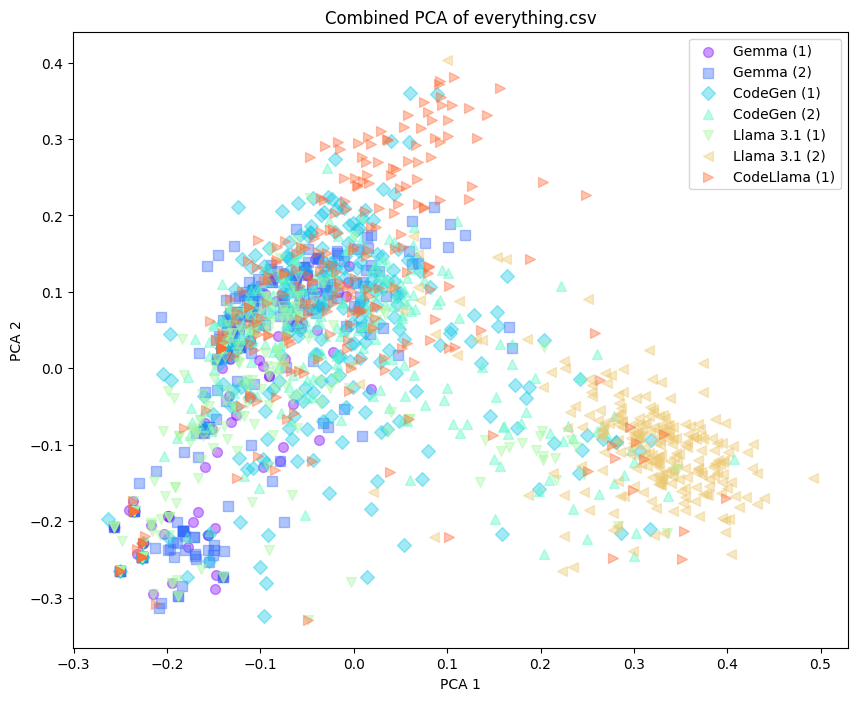

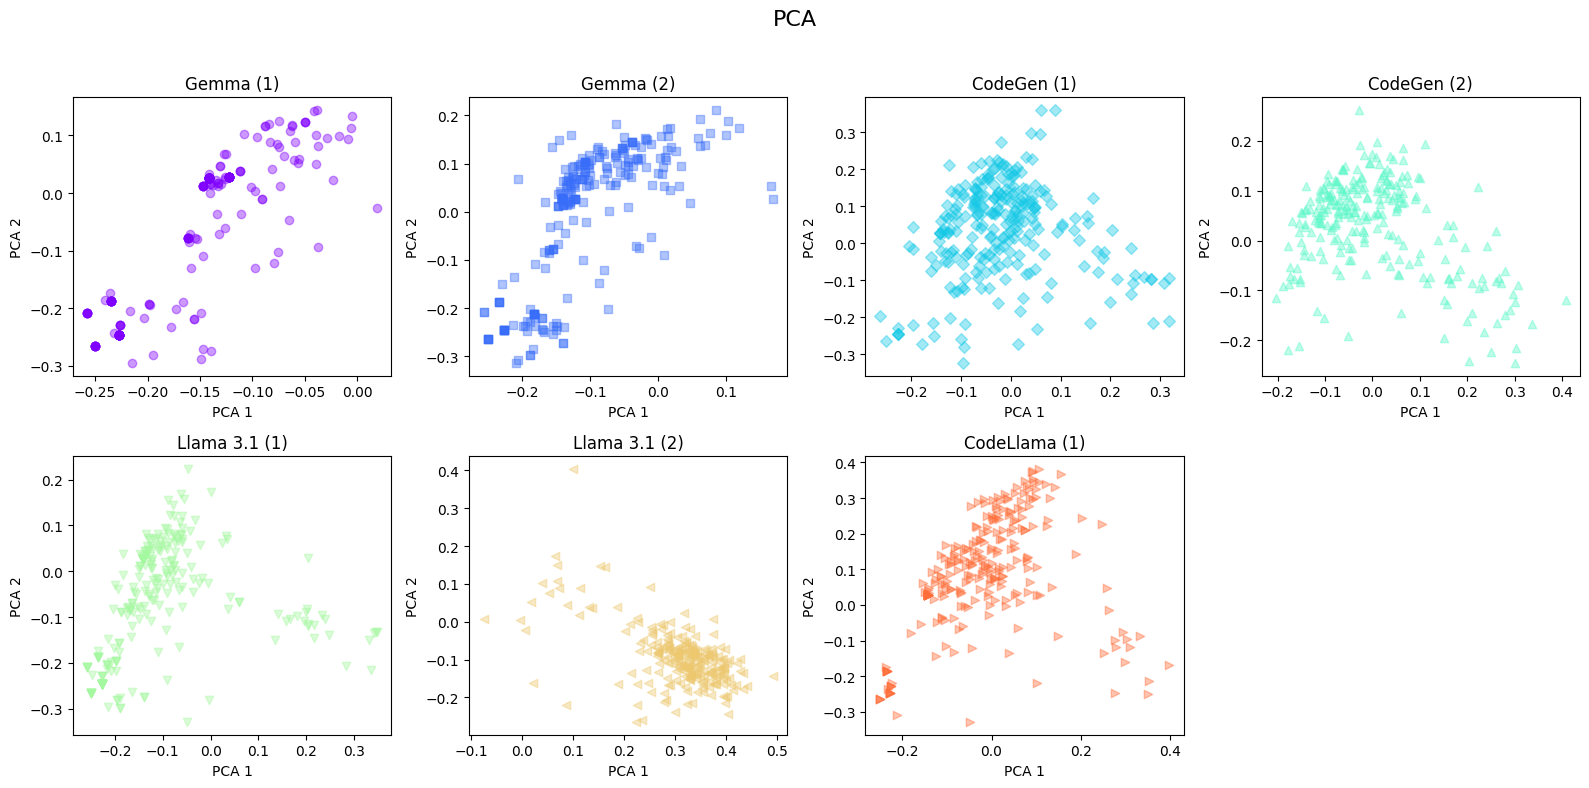

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the CSV file
file_path = './csvs/everything.csv'
data = pd.read_csv(file_path)

# Step 2: Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Step 3: Export the PCA results to a CSV
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
output_file_path = './csvs/pca_result.csv'
pca_df.to_csv(output_file_path, index=False)

# Labels for the colors and markers
labels = ["Gemma (1)", "Gemma (2)", "CodeGen (1)", "CodeGen (2)", 
          "Llama 3.1 (1)", "Llama 3.1 (2)", "CodeLlama (1)", "CodeLlama (2)"]

# Assign the same color to pairs but different shapes
# colors = ['#1f77b4', '#1f77b4', '#ff7f0e', '#ff7f0e', 
#           '#2ca02c', '#2ca02c', '#d62728', '#d62728']
colors = plt.cm.rainbow(np.linspace(0, 1, n_groups))
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P']  # Different shapes

# Number of points per color
points_per_color = 250
n_groups = len(pca_result) // points_per_color

# Step 4: Create the combined plot
plt.figure(figsize=(10, 8))

for i in range(n_groups):
    start_index = i * points_per_color
    end_index = (i + 1) * points_per_color
    plt.scatter(pca_result[start_index:end_index, 0], pca_result[start_index:end_index, 1], 
                color=colors[i], label=labels[i], alpha=0.4, marker=markers[i], s = 50)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Combined PCA of everything.csv')
plt.legend()
#plt.grid(True)  # Add grid to the combined plot
plt.show()

# Step 5: Create subplots faceted by each 250 points in a 2x4 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Add a title that encapsulates all subplots
fig.suptitle('PCA', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each group in its own subplot with different shapes and add grid
for i in range(n_groups):
    start_index = i * points_per_color
    end_index = (i + 1) * points_per_color
    axes[i].scatter(pca_result[start_index:end_index, 0], pca_result[start_index:end_index, 1], 
                    color=colors[i], alpha=0.4, marker=markers[i])
    axes[i].set_title(labels[i])
    
    axes[i].set_xlabel('PCA 1')
    axes[i].set_ylabel('PCA 2')
    #axes[i].grid(True)  # Add grid to each subplot

# Hide any unused subplots if there are fewer than 8 groups
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()


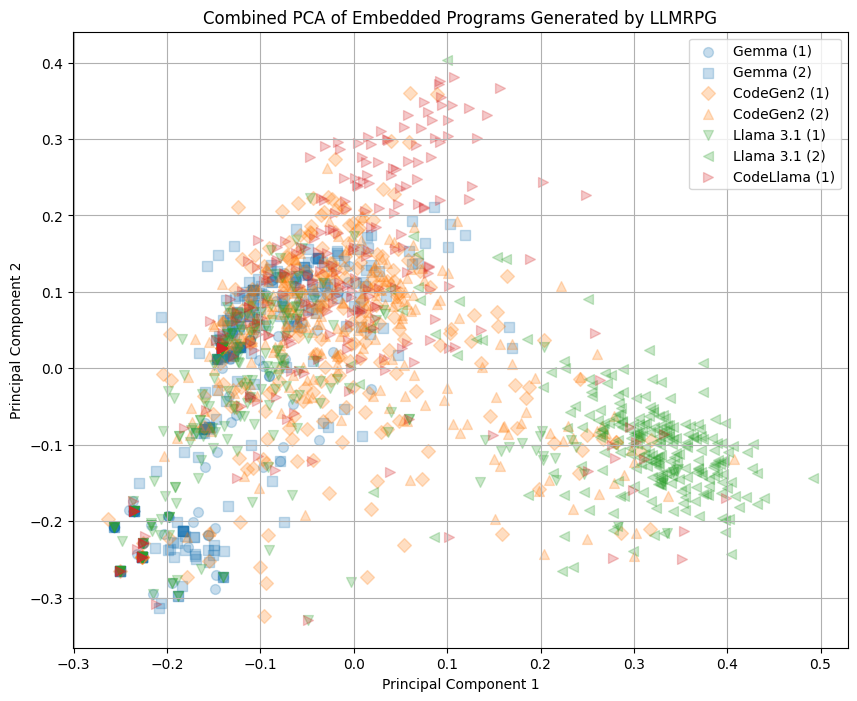

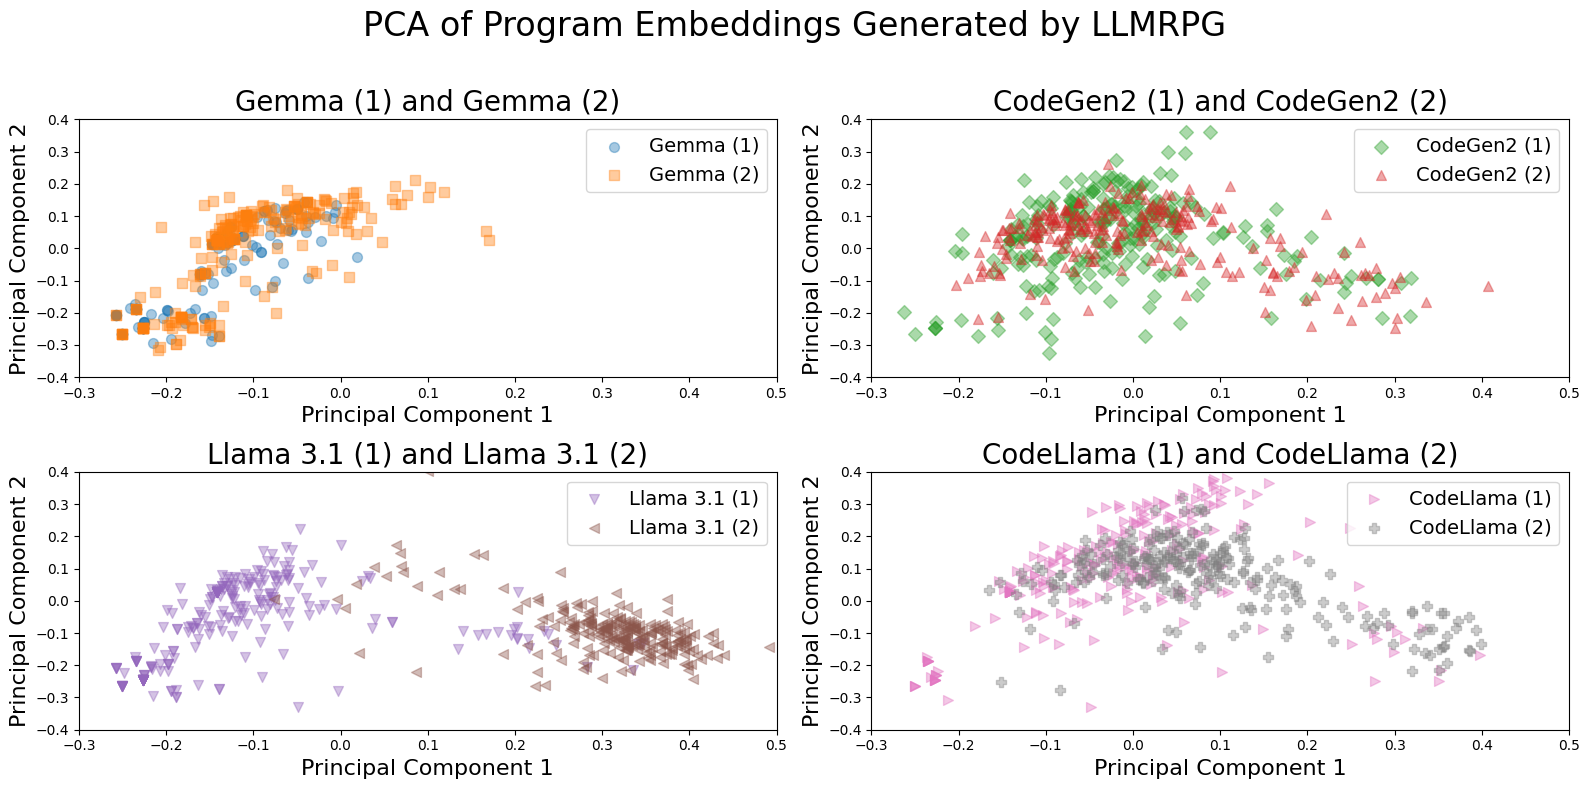

In [39]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read the CSV file
file_path = './csvs/everything.csv'
data = pd.read_csv(file_path)

# Step 2: Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Step 3: Export the PCA results to a CSV
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
output_file_path = './csvs/pca_result.csv'
pca_df.to_csv(output_file_path, index=False)

# Labels for the colors and markers
labels = ["Gemma (1)", "Gemma (2)", "CodeGen2 (1)", "CodeGen2 (2)", 
          "Llama 3.1 (1)", "Llama 3.1 (2)", "CodeLlama (1)", "CodeLlama (2)"]

# Assign colors to related pairs and markers
colors_combined = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Combined colors
colors_subplots = [['#1f77b4', '#ff7f0e'],  # Blue and orange
                   ['#2ca02c', '#d62728'],  # Green and red
                   ['#9467bd', '#8c564b'],  # Purple and brown
                   ['#e377c2', '#7f7f7f']]
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P']  # Different shapes

# Number of points per color
points_per_color = 250
n_groups = len(pca_result) // points_per_color

# Step 4: Create the combined plot with larger scatter points
plt.figure(figsize=(10, 8))

for i in range(n_groups):
    start_index = i * points_per_color
    end_index = (i + 1) * points_per_color
    plt.scatter(pca_result[start_index:end_index, 0], pca_result[start_index:end_index, 1], 
                color=colors_combined[i//2], label=labels[i], alpha=0.25, marker=markers[i], s=50)  # Larger points

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Combined PCA of Embedded Programs Generated by LLMRPG')
plt.legend()
plt.grid(True)  # Add grid to the combined plot
plt.show()

# Step 5: Create subplots with combined groups and different colors within subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Add a title that encapsulates all subplots
fig.suptitle('PCA of Program Embeddings Generated by LLMRPG', fontsize=24)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each pair of groups in its own subplot with different colors and larger points
for i in range(0, n_groups, 2):
    start_index_1 = i * points_per_color
    end_index_1 = (i + 1) * points_per_color
    start_index_2 = (i + 1) * points_per_color
    end_index_2 = (i + 2) * points_per_color
    
    axes[i//2].scatter(pca_result[start_index_1:end_index_1, 0], pca_result[start_index_1:end_index_1, 1], 
                       color=colors_subplots[i//2][0], alpha=0.4, marker=markers[i], s=50, label=labels[i])
    axes[i//2].scatter(pca_result[start_index_2:end_index_2, 0], pca_result[start_index_2:end_index_2, 1], 
                       color=colors_subplots[i//2][1], alpha=0.4, marker=markers[i+1], s=50, label=labels[i+1])
    axes[i//2].set_title(f'{labels[i]} and {labels[i+1]}', fontsize = 20)
    axes[i//2].set_xlabel('Principal Component 1', fontsize = 16)
    axes[i//2].set_ylabel('Principal Component 2', fontsize = 16)
    axes[i//2].set_xlim(-0.3, 0.5)  # Fix x-axis limits
    axes[i//2].set_ylim(-0.4, 0.4)  # Fix y-axis limits
    #axes[i//2].grid(True)  # Add grid to each subplot
    axes[i//2].legend(fontsize = 14)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
plt.show()


TypeError: Input z must be 2D, not 1D

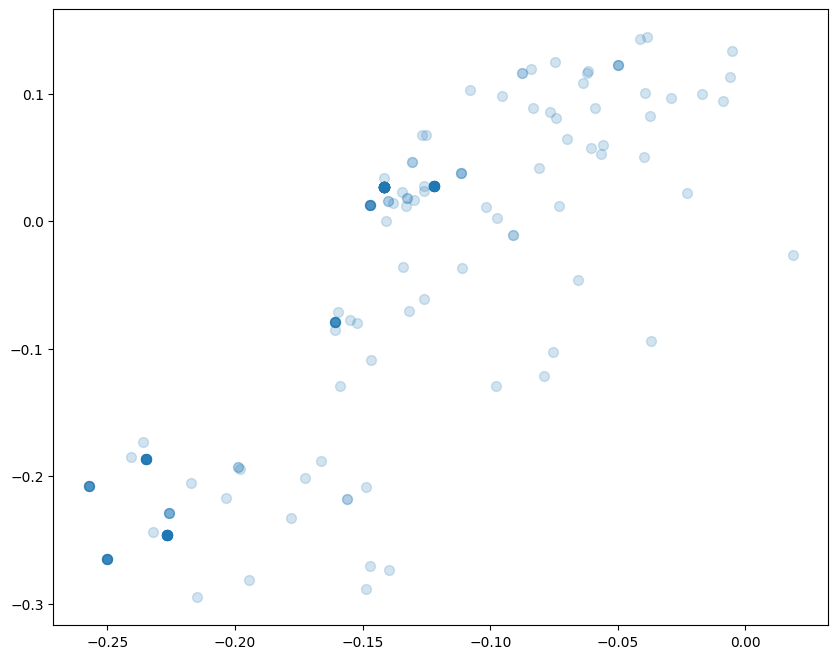